<a href="https://colab.research.google.com/github/adel-parvizi/DeepLearning_Project/blob/main/deep_project_last_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/XL2248/MSCTD.git

Cloning into 'MSCTD'...
remote: Enumerating objects: 1217, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 1217 (delta 13), reused 7 (delta 3), pack-reused 1190
Receiving objects: 100% (1217/1217), 102.24 MiB | 20.24 MiB/s, done.
Resolving deltas: 100% (616/616), done.
Checking out files: 100% (934/934), done.


In [2]:
# !gdown --id 1GAZgPpTUBSfhne-Tp0GDkvSHuq6EMMbj

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Colab_Notebooks/Deep_Learning/deepproject/train_ende.zip"
!unzip "/content/drive/MyDrive/Colab_Notebooks/Deep_Learning/deepproject/test.zip"
!unzip "/content/drive/MyDrive/Colab_Notebooks/Deep_Learning/deepproject/dev.zip"

# DataLoader

In [5]:
import os
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import ToTensor, Lambda
from torch.utils.data import Dataset
import cv2 as cv
import numpy as np
import cv2
import dlib
import re
from itertools import groupby
import pandas
from collections import Counter
import torchvision.transforms as transforms

In [6]:
# english_dev : 5063
# english_test : 5067
# english_train : 20240
# #--------------------
# german_dev : 5063
# german_test : 5067
# german_train : 20240
# #-------------------

In [7]:
ToNumpy = lambda X=None : np.array(X)

In [93]:
y_h = lambda y : torch.zeros(3, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1)
class MSCTDDataset(Dataset):

    def __init__(self, path_to_dataset = None, transform=None, target_transform=None):
        if path_to_dataset == 'path_to_dataset_train':
            Data = 'train'
            path_english_text = 'english_train'
            path_sentiment_text = 'sentiment_train'
            path_image = 'train_ende'
            path_image_index = "image_index_train"
        elif path_to_dataset == 'path_to_dataset_test':
            Data = 'test'
            path_download = 'test_ende'
            path_english_text = 'english_test'
            path_sentiment_text = 'sentiment_test'
            path_image = 'test'
            path_image_index = "image_index_test"
        elif path_to_dataset == 'path_to_dataset_dev':
            Data = 'dev'
            path_download = 'dev'
            path_english_text = 'english_dev'
            path_sentiment_text = 'sentiment_dev'
            path_image = 'dev'
            path_image_index = "image_index_dev"
        else:
            return TypeError, path_to_dataset + " is invalid"
        #!unzip "/content/drive/MyDrive/Colab_Notebooks/Deep_Learning/deepproject/train_ende.zip"
        english_text_path = f"/content/MSCTD/MSCTD_data/ende/{path_english_text}.txt"
        sentiment_path = f"/content/MSCTD/MSCTD_data/ende/{path_sentiment_text}.txt"
        image_index_path = f"/content/MSCTD/MSCTD_data/ende/{path_image_index}.txt"
        self.image_path = f"/content/{path_image}/"

        with open(english_text_path) as f:
          english_text = [line.strip() for line in f.readlines()]
        print(f"{Data} english_text", len(english_text))
        self.englishtext = english_text

        with open(sentiment_path) as f:
          sentiment = [line.strip() for line in f.readlines()]
        self.sentiment = sentiment
        print(f"{Data} sentiment", len(sentiment))
        

        with open(image_index_path) as f:
          indexes = [line.strip() for line in f.readlines()]
        conv_index = []
        for lst in indexes:
          elements = re.findall(r'\d+', lst)
          res = [int(x) for x in elements]
          conv_index.append(res)
        self.conv_index = conv_index
        print(f"number of {Data} conversations", len(self.conv_index))
        # print(self.conv_index)
        Images = os.listdir(self.image_path)
        Images.sort(key = lambda x:  int(x.split(".")[0]))
        self.Images = Images
        # self.target = target
        # self.features = features
        self.transform = transform
        self.target_transform = target_transform
        transform = transforms.Compose([transforms.ToTensor()])
    def __len__(self):
        return len(self.sentiment)

    def __getitem__(self, idx):
        conversation_index = -1
        for i in range(len(self.conv_index)):
          if idx in self.conv_index[i]:
            conversation_index = i+1
            break
        img_path = os.path.join(self.image_path, self.Images[idx])

        img = cv.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # Chnage channel due to imread function read images in BGR coding.
        sntmnt = self.sentiment[idx]
        englsh_txt = self.englishtext[idx]

        if self.target_transform:
            label = y_h(sntmnt)
        if self.transform:
            img = self.transform(img)
        return img, englsh_txt, sntmnt, conversation_index

In [94]:
train = MSCTDDataset('path_to_dataset_train', target_transform = False, transform = ToNumpy())
test = MSCTDDataset('path_to_dataset_test', target_transform = False, transform =ToTensor())
dev = MSCTDDataset('path_to_dataset_dev', target_transform = False)

train english_text 20240
train sentiment 20240
number of train conversations 2066
test english_text 5067
test sentiment 5067
number of test conversations 509
dev english_text 5063
dev sentiment 5063
number of dev conversations 504


In [95]:
image, en_text, sentiment, _ = train[4452]
image_tensor, _, _, _ = test[4452]

In [96]:
print(type(image_tensor))
print(type(image))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


In [97]:
print(image_tensor[0:5,0:5,0])
print(image[0:5,0:5,0])

tensor([[0.1373, 0.1373, 0.1373, 0.1373, 0.1373],
        [0.0980, 0.0980, 0.0980, 0.0980, 0.0941],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0078]])
[[51 51 51 51 51]
 [51 51 51 51 51]
 [51 51 51 50 50]
 [51 51 50 50 50]
 [50 50 50 50 50]]


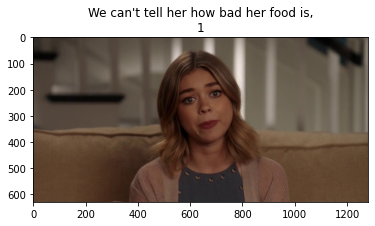

In [98]:
plt.title(en_text+"\n" + sentiment)
plt.imshow(image)

# Dataset Interpretation

## Part0 : DataLoader split sections for each set

**We put this section to split text and sentiment classes for train, dev and test set. regard of RAM limitation, we can't save images in a numpy array or tensor** 

**It takes about 10 minutes**

In [99]:
train = MSCTDDataset('path_to_dataset_train', target_transform = False)
test = MSCTDDataset('path_to_dataset_test', target_transform = False)
dev = MSCTDDataset('path_to_dataset_dev', target_transform = False)

train english_text 20240
train sentiment 20240
number of train conversations 2066
test english_text 5067
test sentiment 5067
number of test conversations 509
dev english_text 5063
dev sentiment 5063
number of dev conversations 504


In [100]:
text_list = []
sentiment_list = []
def split(label_set, dataloader):
    length = len(dataloader)
    text = []
    sentiment = np.zeros((length))
    for i in range(length):
        text.append(dataloader[i][1])
        sentiment[i] = dataloader[i][2]
    text_list.append(text)
    sentiment_list.append(sentiment)

split("train", train)
split("test", test)
split("dev", dev)

In [101]:
print(f"sentiment_list is: {len(sentiment_list)}")
print(f"text_list is: {len(text_list)}")

sentiment_list is: 3
text_list is: 3


## Part1 : Histogram of data based on sentiments

**Interpretation** : This histogram shows the distribution of classes. with this plot, we intuit whether use data augmentation or balance dataset methods before training procedure. From hitogram plots, we can see that test_set have different distribution in comparision with train and dev sets for class 0.

In [102]:
def sentiemnt_histogram(set_label, snetiment_array):

    plt.title(f"Histogram of {set_label}_set sentiment classes")
    plt.bar(*np.unique(snetiment_array, return_counts=True))

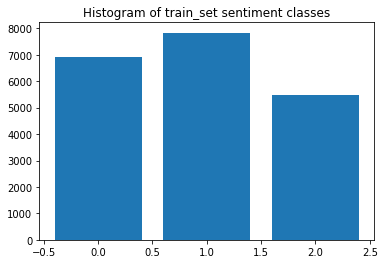

In [103]:
# Train

sentiemnt_histogram("train", sentiment_list[0])

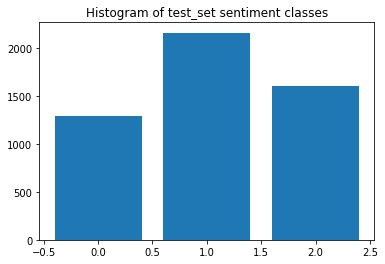

In [104]:
# Test
sentiemnt_histogram("test", sentiment_list[1])

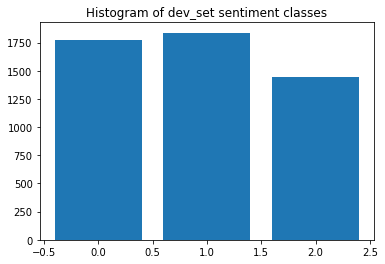

In [105]:
# Dev
sentiemnt_histogram("dev", sentiment_list[2])

## Part2: Histogram, Mean and Variance of sentences

**Interpretation** : Variance and mean of the sentences (length of the words) are important parameters in future RNN train procedure, these values may be used for data normalization.


In [106]:
def text_histogram(set_label, text):
    text_length = np.zeros((len(text)))
    for i in range(len(text)):
        text_length[i] = len(text[i].split(" "))

    print(f"Mean value of {set_label}_set sentences (based on words) is: {np.mean(text_length)}")
    print(f"Var value of {set_label}_set sentences (based on words) is: {np.var(text_length)}")

    plt.title(f"Histogram of {set_label}_set sentences (based on words)")
    plt.bar(*np.unique(text_length, return_counts=True))

Mean value of train_set sentences (based on words) is: 6.4644268774703555
Var value of train_set sentences (based on words) is: 9.247252339514754


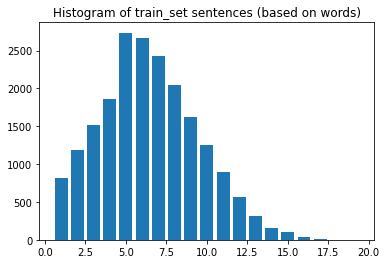

In [107]:
#Train 

text_histogram("train", text_list[0])

Mean value of test_set sentences (based on words) is: 6.303927373199132
Var value of test_set sentences (based on words) is: 8.892826494034605


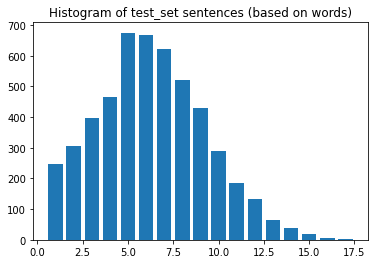

In [108]:
#Test

text_histogram("test", text_list[1])

Mean value of dev_set sentences (based on words) is: 6.310290341694648
Var value of dev_set sentences (based on words) is: 8.630759208611043


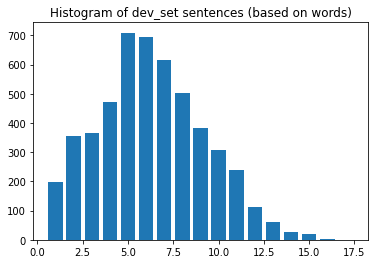

In [109]:
#Dev

text_histogram("dev", text_list[2])

## Part3 : Histogram, Mean and Variance number of images in each converstation

**Note : We did not locate image series of converstations in DataLoader. Based on future phases, we decide to whether put this section in Dataloader or not.**

**Interpretation** : like sentences, this parameter may be used for normalization.

In [114]:
def converstation_histogram(set_label, index_path):
    with open(index_path) as f:
        converstations = f.readlines()
    line_arrays = np.zeros((len(converstations)))
    for index in range(len(converstations)):
        line_arrays[index] = len(converstations[index].split(","))
    print(f"Mean value of {set_label}_set based on number of images in converstation is: {np.mean(line_arrays)}")
    print(f"Var value of {set_label}_set based on number of images in converstation is: {np.var(line_arrays)}")

    plt.title(f"Histogram of {set_label}_set based on number of images in converstation is: ")
    plt.bar(*np.unique(line_arrays, return_counts=True))

Mean value of train_set based on number of images in converstation is: 9.796708615682478
Var value of train_set based on number of images in converstation is: 17.69632992187156


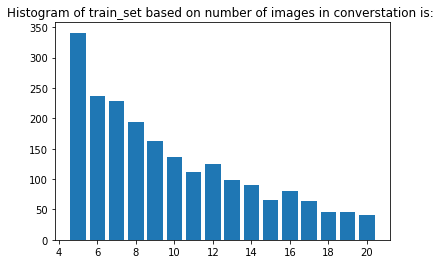

In [115]:
# Train
train_index_path = '/content/MSCTD/MSCTD_data/ende/image_index_train.txt'
converstation_histogram('train', train_index_path)

Mean value of test_set based on number of images in converstation is: 9.954813359528487
Var value of test_set based on number of images in converstation is: 17.752378599742936


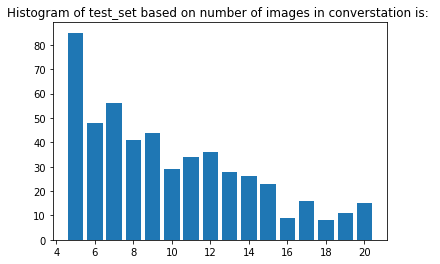

In [116]:
# Test
test_index_path = '/content/MSCTD/MSCTD_data/ende/image_index_test.txt'
converstation_histogram('test', test_index_path)

Mean value of dev_set based on number of images in converstation is: 10.045634920634921
Var value of dev_set based on number of images in converstation is: 19.253869834971024


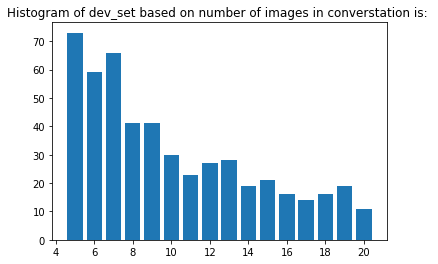

In [117]:
# Dev
dev_index_path = '/content/MSCTD/MSCTD_data/ende/image_index_dev.txt'
converstation_histogram('dev', dev_index_path)

## Part4: Histogram, Mean and Variance of faces in each image

**Interpretation** : The important parameter which is effective in computer vision task is number of faces in each image, as we see in this histogram, up to 10% of images have 2 or more faces and this parameter may make problem when we want predict sentiment classes by these images.

**It takes about 60 minutes**

In [29]:
def image_histogram(set_label, dataloader):
    image_count = []
    detector = dlib.get_frontal_face_detector()
    for i in range(len(dataloader)):
        image = dataloader[i][0]
        numberOffaces = detector(image)
        image_count.append(len(numberOffaces))

    ArrayImageCount = np.array(image_count)
    print(f"Mean value of {set_label}_set based on number of faces in images is: {np.mean(ArrayImageCount)}")
    print(f"Var value of {set_label}_set based on number of faces in images is: {np.var(ArrayImageCount)}")

    plt.title(f"Histogram of {set_label}_set based on number of faces in images is")
    plt.bar(*np.unique(ArrayImageCount, return_counts=True))




Mean value of train_set based on number of faces in images is: 0.6770750988142292
Var value of train_set based on number of faces in images is: 0.7564902591823025


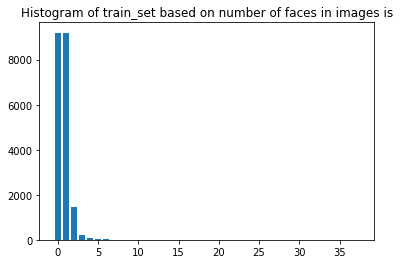

In [30]:
# Train
# It takes about 40 minutes

image_histogram("train", train)

Mean value of test_set based on number of faces in images is: 0.738898756660746
Var value of test_set based on number of faces in images is: 0.5382993990649629


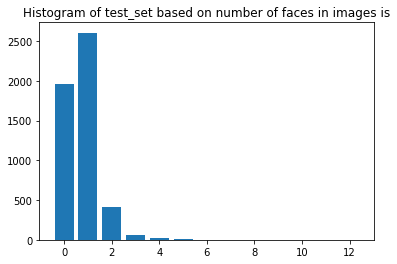

In [34]:
# Test
# It takes about 10 minutes

image_histogram("test", test)

Mean value of dev_set based on number of faces in images is: 0.6539601027059055
Var value of dev_set based on number of faces in images is: 0.45027416550281385


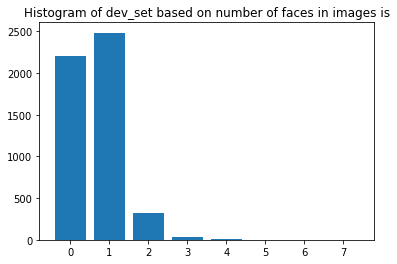

In [35]:
# Dev
# It takes about 10 minutes

image_histogram("dev", dev)

## Part5: Correlation of number of words and sentiments

**Interpretation** : This part is about finding correlation of lenght of sentences and sentiments. as we can see in each dataset(train, test, dev) and each sentiment it looks like that most of sentences are in normal size between 4 and 8 words. In all datasets and all sentiments, long and very short sentences are rare. 

In [36]:
def len_sentiment_corr(set_label, text, snetiment_array):
    text_length = np.zeros((len(text)))
    for i in range(len(text)):
        text_length[i] = len(text[i].split(" "))

    text_length_sentiment0=text_length[snetiment_array == 0]
    text_length_sentiment1=text_length[snetiment_array == 1]
    text_length_sentiment2=text_length[snetiment_array == 2]
    plt.title(f"Correlation of {set_label}_set number of words and sentiments")
    plt.plot(*np.unique(text_length_sentiment0, return_counts=True), color='r', label='sentiment0')
    plt.plot(*np.unique(text_length_sentiment1, return_counts=True), color='g', label='sentiment1')
    plt.plot(*np.unique(text_length_sentiment2, return_counts=True), color='b', label='sentiment2')
    plt.legend()
    plt.show()


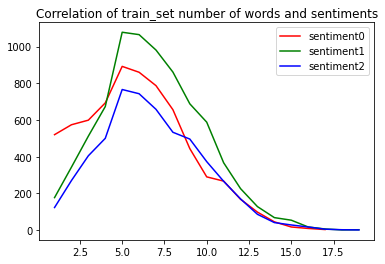

In [37]:
#Train 

len_sentiment_corr("train", text_list[0], sentiment_list[0])

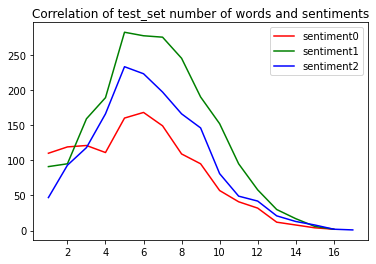

In [38]:
#Test

len_sentiment_corr("test", text_list[1], sentiment_list[1])

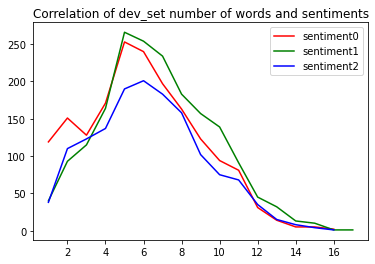

In [39]:
#Dev

len_sentiment_corr("dev", text_list[2], sentiment_list[2])

## Part6: Histogram of sequence of sentiments

**Interpretation** : Sequence of sentiments is a useful feature since we can find how usualy the sentiments will change and how many times these changes will occure. 

In [40]:
def converstation_pattern_histogram(set_label, index_path, snetiment_array):
    s = '[],'
    with open(index_path) as f:
        converstations = f.readlines()
    
    converstations = [re.sub('[\[\]]',"",x) for x in converstations]

    uniq_list = []
    for index in range(len(converstations)):
        uniq_pattern=snetiment_array[[int(x) for x in converstations[index].split(",")]]
        uniq_list.append(''.join([str(int(i[0])) for i in groupby(uniq_pattern)]))
    uniq_counts = Counter(uniq_list)
    
    fig = plt.figure(figsize=(150,8))
    plt.title(f"Histogram of {set_label}_set based on number of uniq sentiments sequence in converstation is: ")
    plt.bar(*zip(*uniq_counts.items()))
    plt.xticks(rotation='vertical')
    plt.show()
    return len(uniq_counts)

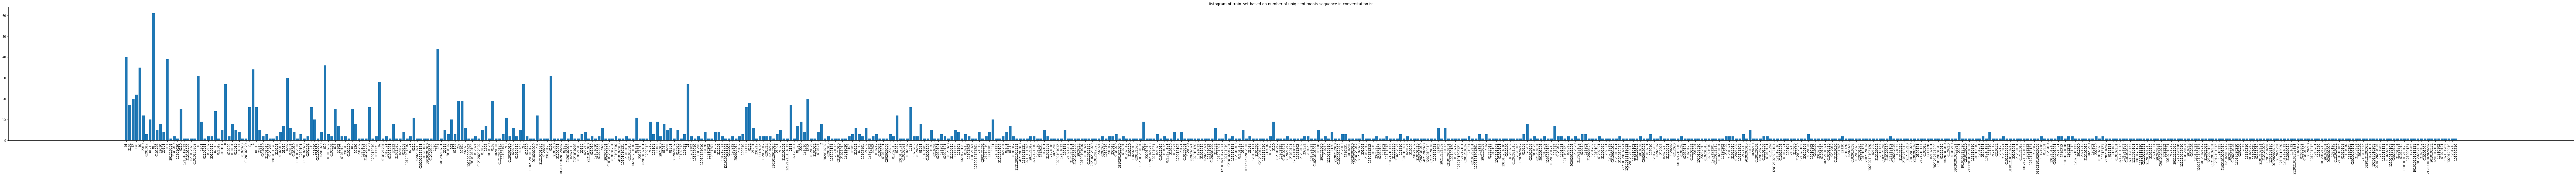

Number of different sequences in Train: 681


In [41]:
# Train

train_index_path = '/content/MSCTD/MSCTD_data/ende/image_index_train.txt'
class_len = converstation_pattern_histogram('train', train_index_path, sentiment_list[0])
print("Number of different sequences in Train: " + str(class_len))

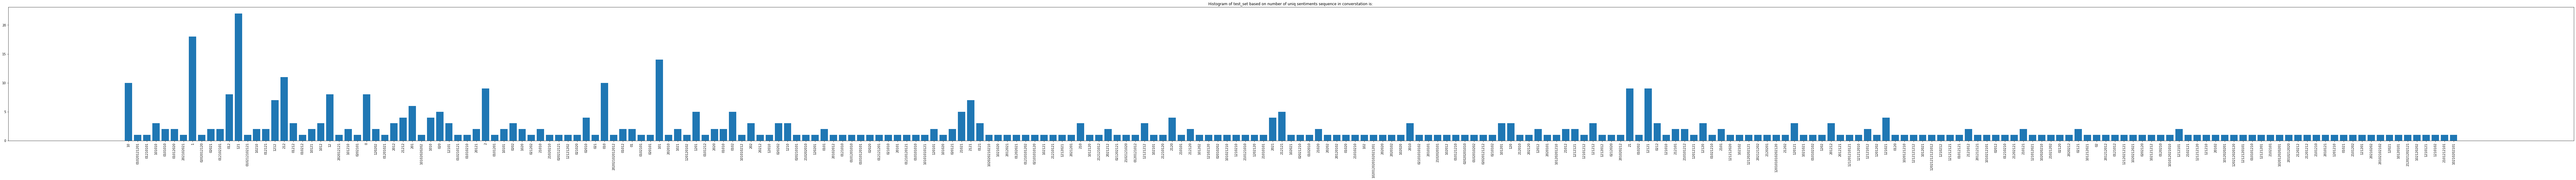

Number of different sequences in Test: 255


In [42]:
# Test

test_index_path = '/content/MSCTD/MSCTD_data/ende/image_index_test.txt'
class_len = converstation_pattern_histogram('test', test_index_path, sentiment_list[1])
print("Number of different sequences in Test: " + str(class_len))

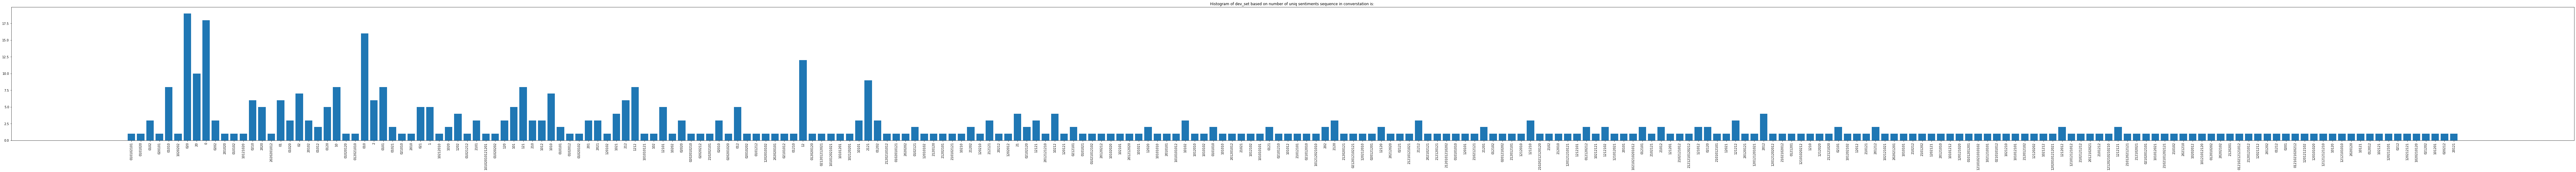

Number of different sequences in Dev: 250


In [43]:
# Dev

dev_index_path = '/content/MSCTD/MSCTD_data/ende/image_index_dev.txt'
class_len = converstation_pattern_histogram('dev', dev_index_path, sentiment_list[2])
print("Number of different sequences in Dev: " + str(class_len))

## Part7: histogram class num to theoretical number of sequences

**Interpretation** : In this part we need to calculate the theoretical number of sequences that are possible in a given length. The formula for this calculation is as below:

$$
  seqnum=3*\sum_{k=1}^n 2^\left(k-1\right) 
$$

this formula means that we can select each of 3 sentiments for the first place but other places should be different from the last place. so we reach to this formula.




In [44]:
def converstation_avg_len(set_label, index_path):
    s = '[],'
    with open(index_path) as f:
        converstations = f.readlines()
    
    converstations = [re.sub('[\[\]]',"",x) for x in converstations]

    avg_list = []
    for index in range(len(converstations)):
        avg_list.append(len([int(x) for x in converstations[index].split(",")]))
    avg = (int)(sum(avg_list) / len(avg_list))
    print("Rounded average len of converstations is: " + str(avg))
    s = 0
    for i in range(avg):
      s += 3 * (2**i)
    print("Total number of possible sequences is: " + str(s))
    return s

In [45]:
# Train

train_index_path = '/content/MSCTD/MSCTD_data/ende/image_index_train.txt'
s = converstation_avg_len('train', train_index_path)
print("The ratio of found histogram classes to all possible classes is: " + str(681 / s ))

Rounded average len of converstations is: 9
Total number of possible sequences is: 1533
The ratio of found histogram classes to all possible classes is: 0.44422700587084146


In [46]:
# Test

test_index_path = '/content/MSCTD/MSCTD_data/ende/image_index_test.txt'
s = converstation_avg_len('test', test_index_path)
print("So the ratio of found histogram classes to all possible classes is: " + str(255 / s ))

Rounded average len of converstations is: 9
Total number of possible sequences is: 1533
So the ratio of found histogram classes to all possible classes is: 0.16634050880626222


In [47]:
# Dev

dev_index_path = '/content/MSCTD/MSCTD_data/ende/image_index_dev.txt'
s = converstation_avg_len('dev', dev_index_path)
print("So the ratio of found histogram classes to all possible classes is: " + str(250 / s ))

Rounded average len of converstations is: 10
Total number of possible sequences is: 3069
So the ratio of found histogram classes to all possible classes is: 0.08145975887911372
